In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras.regularizers import L1, L2, L1L2

In [2]:
df: pd.DataFrame = pd.read_csv('/kaggle/input/heart-disease/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
x = df.drop(['target'], axis=1)
y = df['target']

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [6]:
regs = ['l1', 'l2', 'l1_l2']

In [10]:
def make_model(_reg, _i) -> keras.Sequential:
    model = keras.Sequential(name=f'heartReg_{_i}')
    model.add(keras.Input((13,)))
    model.add(Dense(256, activation='relu', activity_regularizer=_reg))
    model.add(Dense(256, activation='relu', activity_regularizer=_reg))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    model.summary()
    return model

In [11]:
models = []
for i, reg in enumerate(regs):
    model = make_model(reg, i)
    models.append(model)

Model: "heartReg_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               3584      
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 69633 (272.00 KB)
Trainable params: 69633 (272.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "heartReg_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               3584      
                                                                

In [18]:
histories = []
for i, model in enumerate(models):
    histories.append(model.fit(xtrain, ytrain, epochs=30, batch_size=10).history)
    model.save(f'saved/Q2/heartReg_{i}.h5')

Epoch 1/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5765 - accuracy: 0.7048
Epoch 2/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5717 - accuracy: 0.7269
Epoch 3/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5610 - accuracy: 0.7357
Epoch 4/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.7489
Epoch 5/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5726 - accuracy: 0.7489
Epoch 6/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5608 - accuracy: 0.7533
Epoch 7/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5806 - accuracy: 0.7577
Epoch 8/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5851 - accuracy: 0.7048
Epoch 9/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5573 - accuracy: 0.7533
Epoch 10/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5479 - accuracy: 0.7445
Epoch 11/30
23/23 [

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 0s 4ms/step - loss: 0.5473 - accuracy: 0.7621
Epoch 2/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5058 - accuracy: 0.8282
Epoch 3/30
23/23 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.8326
Epoch 4/30
23/23 [==============================] - 0s 4ms/step - loss: 0.4463 - accuracy: 0.8414
Epoch 5/30
23/23 [==============================] - 0s 4ms/step - loss: 0.4527 - accuracy: 0.8326
Epoch 6/30
23/23 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 0.8590
Epoch 7/30
23/23 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8502
Epoch 8/30
23/23 [==============================] - 0s 4ms/step - loss: 0.4250 - accuracy: 0.8414
Epoch 9/30
23/23 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.8018
Epoch 10/30
23/23 [==============================] - 0s 4ms/step - loss: 0.4321 - accuracy: 0.8678
Epoch 11/30
23/23 [===========

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 0s 4ms/step - loss: 0.5520 - accuracy: 0.7753
Epoch 2/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5581 - accuracy: 0.7533
Epoch 3/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.7797
Epoch 4/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.7313
Epoch 5/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5337 - accuracy: 0.7621
Epoch 6/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5220 - accuracy: 0.7930
Epoch 7/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5224 - accuracy: 0.7841
Epoch 8/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5828 - accuracy: 0.7137
Epoch 9/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.7577
Epoch 10/30
23/23 [==============================] - 0s 5ms/step - loss: 0.5683 - accuracy: 0.7665
Epoch 11/30
23/23 [===========

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
histories[0].keys()

dict_keys(['loss', 'accuracy'])

In [20]:
acc_scores = []
hs = []
for i, model in enumerate(models):
    ypred = model.predict(xtest)
    print(ypred.shape)
    for j in range(len(ypred)):
        if ypred[j] < 0.5: ypred[j] = 0
        else: ypred[j] = 1
    print(ypred.shape)
    
    acc_scores.append(accuracy_score(ytest, ypred))

    hs.append({
        'acc': histories[i]['accuracy'],
        'loss': histories[i]['loss']
    })    

3/3 [==============================] - 0s 3ms/step
(76, 1)
(76, 1)
3/3 [==============================] - 0s 3ms/step
(76, 1)
(76, 1)
3/3 [==============================] - 0s 3ms/step
(76, 1)
(76, 1)


In [21]:
for i, reg in enumerate(regs):
    print(f'{reg}: {acc_scores[i]:.2f}')

l1: 0.75
l2: 0.72
l1_l2: 0.75


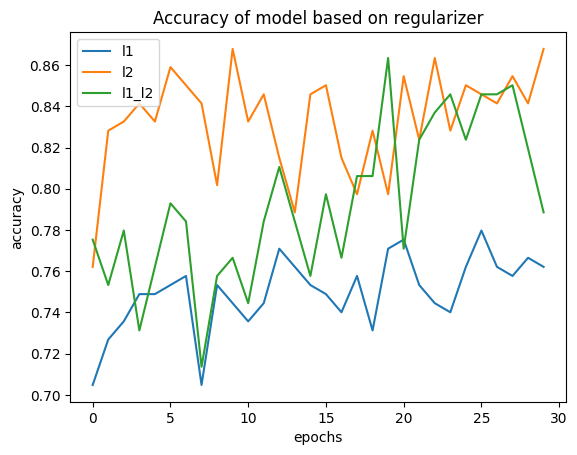

In [22]:
for i in range(len(hs)):
    plt.plot(hs[i]['acc'])
    plt.title('Accuracy of model based on regularizer')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')

plt.legend(regs, loc='upper left')
plt.show()

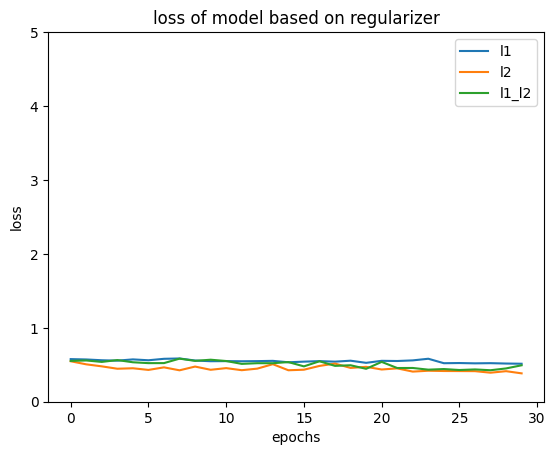

In [24]:
for i in range(len(hs)):
    plt.plot(hs[i]['loss'])
    plt.title('loss of model based on regularizer')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.ylim([0.0, 5.0])

plt.legend(regs, loc='upper right')
plt.show()